# 简易散点图

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

## 1. 用plt.plot画散点图

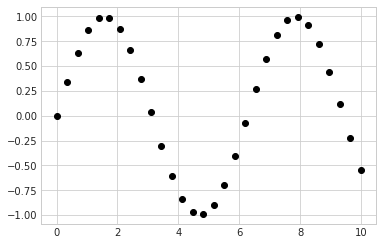

In [2]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black')  # 函数的第三个参数是一个字符，表示图形符号的类型。

(0.0, 1.8)

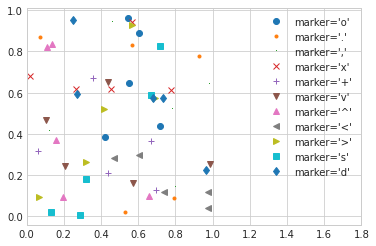

In [3]:
# 不同的图形标记
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8)

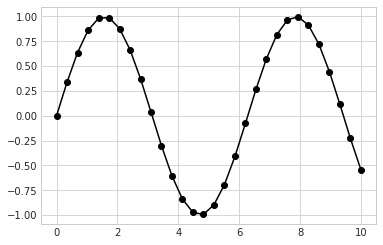

In [4]:
plt.plot(x, y, '-ok')  # 直线（-）、圆圈（o）、黑色（k）

另外，`plt.plot` 支持许多设置线条和散点属性的参数：

(-1.2, 1.2)

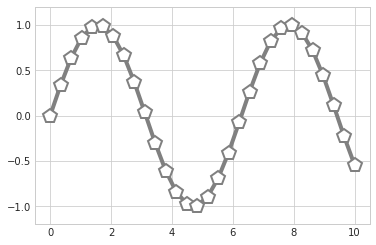

In [5]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2)

## 2. 用plt.scatter画散点图

另一个可以创建散点图的函数是 `plt.scatter`。它的功能非常强大，其用法与 `plt.plot` 函数类似。  
`plt.scatter` 与 `plt.plot` 的主要差别在于，前者在创建散点图时具有更高的灵活性，可以单独控制每个散点与数据匹配，也可以让每个散点具有不同的属性（大小、表面颜色、边框颜色等）。

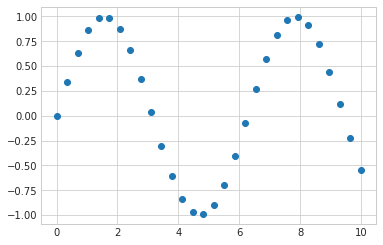

In [6]:
plt.scatter(x, y, marker='o')

下面来创建一个随机散点图，里面有各种颜色和大小的散点。为了能更好地显示重叠部分，用 `alpha` 参数来调整透明度：

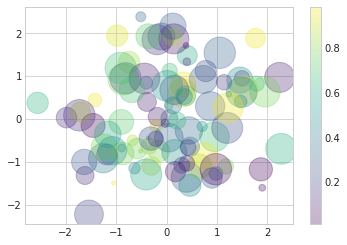

In [7]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar()  # 显示颜色条

请注意，颜色自动映射成颜色条（`color scale`，通过 `colorbar()` 显示），散点的大小以像素为单位。这样，散点的颜色与大小就可以在可视化图中显示多维数据的信息了。

可以用 `Scikit-Learn` 程序库里面的鸢尾花（`iris`）数据来演示。  
它里面有三种鸢尾花，每个样本是一种花，其花瓣（`petal`）与花萼（`sepal`）的长度与宽度都经过了仔细测量：

Text(0, 0.5, 'sepal width (cm)')

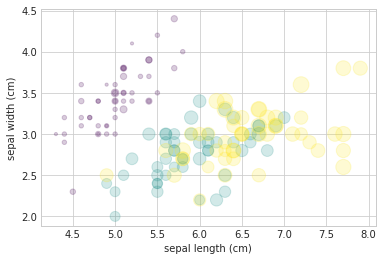

In [8]:
from sklearn.datasets import load_iris

iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

In [9]:
# 将上面的 iris 数据，本地保存一份
from sklearn import datasets
import pandas as pd

def sklearn_to_df(sklearn_dataset):
    """将 sklearn.utils.Bunch 转为 pandas.DataFrame"""
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

In [10]:
# 将上面的 iris 数据，本地保存一份
# df_iris = sklearn_to_df(datasets.load_iris())
# df_iris.to_csv('../data/sklearn_iris.csv')

散点图可以让我们同时看到不同维度的数据：每个点的坐标值 (x, y) 分别表示花萼的长度和宽度，而点的大小表示花瓣的宽度，三种颜色对应三种不同类型的鸢尾花。  
这类多颜色与多特征的散点图在探索与演示数据时非常有用。

## 3. plot与scatter：效率对比

`plt.plot` 与 `plt.scatter` 除了特征上的差异之外，还有什么影响我们选择的因素呢？  
在数据量较小的时候，两者在效率上的差异不大。但是当数据变大到几千个散点时，`plt.plot` 的效率将大大高于 `plt.scatter`。  
这是由于 `plt.scatter` 会对每个散点进行单独的大小与颜色的渲染，因此渲染器会消耗更多的资源。  
而在 `plt.plot` 中，散点基本都彼此复制，因此整个数据集中所有点的颜色、尺寸只需要配置一次。  
由于这两种方法在处理大型数据集时有很大的性能差异，因此面对大型数据集时，`plt.plot` 方法比 `plt.scatter` 方法好。